In [ ]:
# importing importent libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 1.26MB/s]


In [ ]:
# Loading the dataset

df = pd.read_csv('ola_driver_scaler.csv')

df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


##**Define Problem Statement and perform Exploratory Data Analysis**

In [ ]:
df.shape

(19104, 14)

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df1.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# conversion of categorical attributes to 'category'

#df1['Age'].astype('category')
df1['Gender'] = df1['Gender'].astype('category')
df1['City'] = df1['City'].astype('category')
df1['Education_Level'] = df1['Education_Level'].astype('category')
df1['Joining Designation'] = df1['Joining Designation'].astype('category')
df1['Grade'] = df1['Grade'].astype('category')
df1['Quarterly Rating'] = df1['Quarterly Rating'].astype('category')

In [ ]:
# convering the DataTypes of the features which are incorrect

df1['MMM-YY'] = df1['MMM-YY'].astype('datetime64[ns]')
df1['Dateofjoining'] = df1['Dateofjoining'].astype('datetime64[ns]')
df1['LastWorkingDate'] = df1['LastWorkingDate'].astype('datetime64[ns]')

In [ ]:
df1.describe()

,MMM-YY,Driver_ID,Age,Income,Dateofjoining,LastWorkingDate,Total Business Value
count,19104,19104.000000,19043.000000,19104.000000,19104,1616,1.910400e+04
mean,2019-12-11 02:09:29.849246464,1415.591133,34.668435,65652.025126,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,5.716621e+05
min,2019-01-01 00:00:00,1.000000,21.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,-6.000000e+06
25%,2019-06-01 00:00:00,710.000000,30.000000,42383.000000,2016-11-29 12:00:00,2019-06-06 00:00:00,0.000000e+00
50%,2019-12-01 00:00:00,1417.000000,34.000000,60087.000000,2018-09-12 00:00:00,2019-12-20 12:00:00,2.500000e+05
75%,2020-07-01 00:00:00,2137.000000,39.000000,83969.000000,2019-11-05 00:00:00,2020-07-03 00:00:00,6.997000e+05
max,2020-12-01 00:00:00,2788.000000,58.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,3.374772e+07
std,NaN,810.705321,6.257912,30914.515344,NaN,NaN,1.128312e+06


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  category      
 4   City                  19104 non-null  category      
 5   Education_Level       19104 non-null  category      
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  category      
 10  Grade                 19104 non-null  category      
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  category      
dtypes: category(6), 

In [ ]:
df['Driver_ID'].duplicated()

,Driver_ID
0,False
1,True
2,True
3,False
4,True
...,...
19099,True
19100,True
19101,True
19102,True


In [ ]:
#Missing values in our dataset

df1.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


##Univariate Analysis

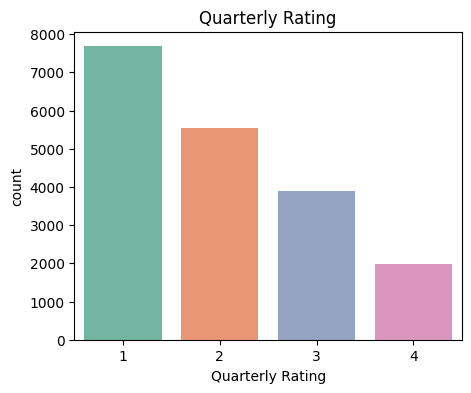

In [ ]:
# Count of Quarterly Rating

plt.figure(figsize=(5,4))
sns.countplot(x=df1['Quarterly Rating'],palette="Set2")
plt.title('Quarterly Rating')
plt.show()

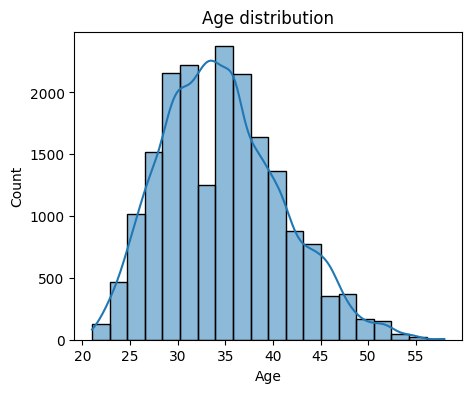

In [ ]:
# Ploting the age
plt.figure(figsize=(5,4))
sns.histplot(df1['Age'],bins=20,kde=True,palette='Set2')
plt.title('Age distribution')
plt.show()

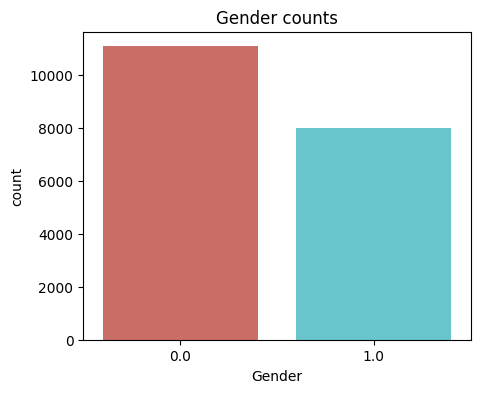

In [ ]:
# Male : 0, Female: 1
plt.figure(figsize=(5,4))
sns.countplot(x=df1['Gender'],palette='hls')
plt.title('Gender counts')
plt.show()

In [ ]:
#Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

df1['Education_Level'].value_counts()

,count
Education_Level,
1,6864
2,6327
0,5913


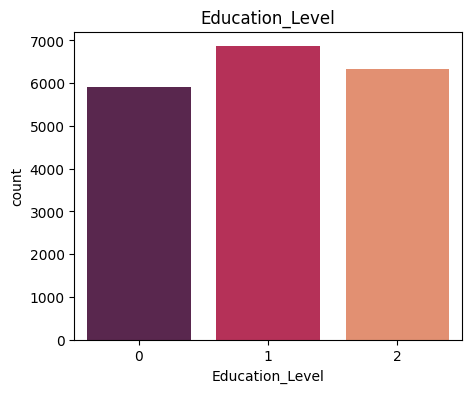

In [ ]:
#Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
plt.figure(figsize=(5,4))
sns.countplot(x=df1['Education_Level'],palette="rocket")
plt.title('Education_Level')
plt.show()

##Bivariate Analysis

In [ ]:
df1['MMM-YY'] = pd.to_datetime(df1['MMM-YY'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  category      
 4   City                  19104 non-null  category      
 5   Education_Level       19104 non-null  category      
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  category      
 10  Grade                 19104 non-null  category      
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  category      
dtypes: category(6), 

In [ ]:
df1.head()
df1.rename(columns={'MMM-YY':'Date'},inplace=True)

In [ ]:
pd.crosstab(df1['Grade'],df1['Gender'])

Gender,0.0,1.0
Grade,,
1,2984,2195
2,3905,2708
3,2774,2040
4,1235,907
5,176,128


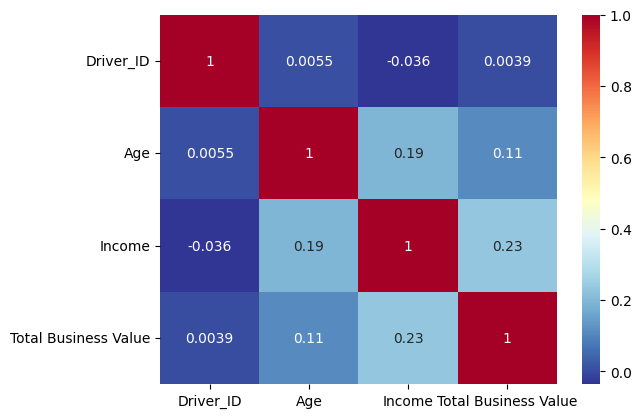

In [ ]:
#Correlations between the features

df1.corr(numeric_only=True)
sns.heatmap(df1.corr(numeric_only=True),annot=True,cmap='RdYlBu_r')
plt.show()

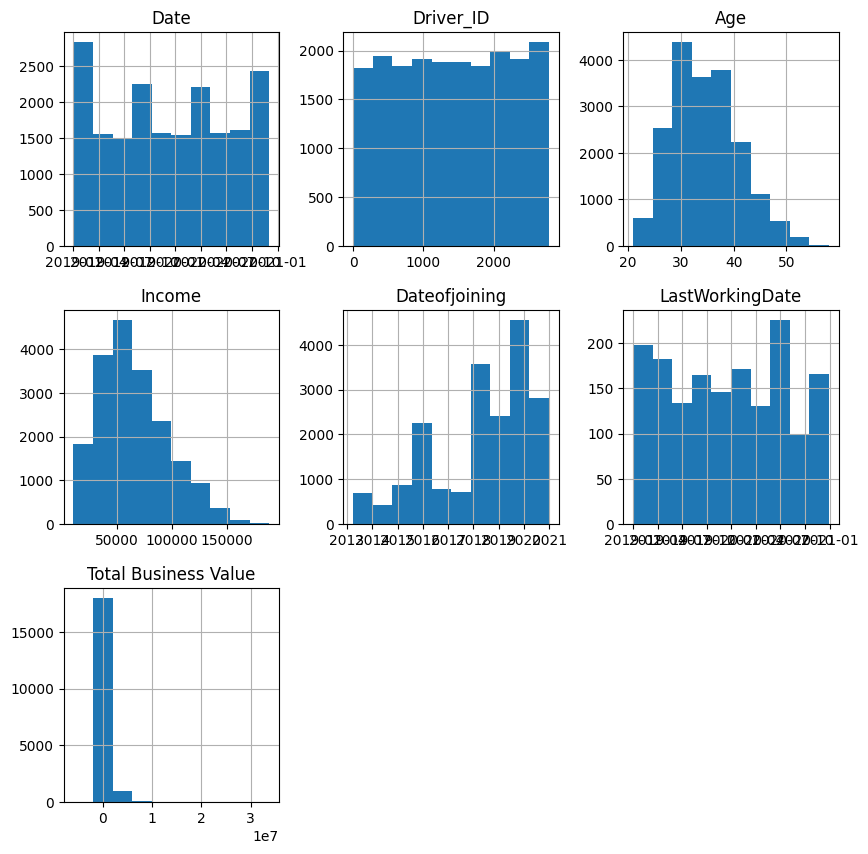

In [ ]:
df1.hist(figsize=(10,10))
plt.show()

In [ ]:
##df1.drop(columns='Driver_ID',inplace=True)

In [ ]:
#from matplotlib import colormaps
#list(colormaps)

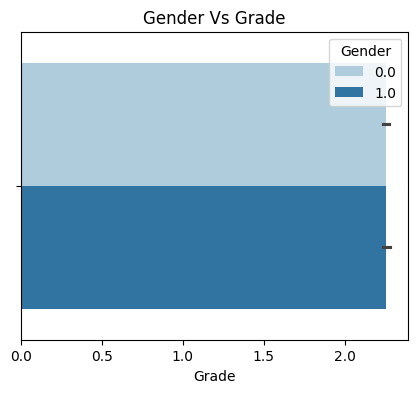

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(data=df1,x='Grade',hue='Gender',palette='Paired')
plt.title('Gender Vs Grade')
plt.show()

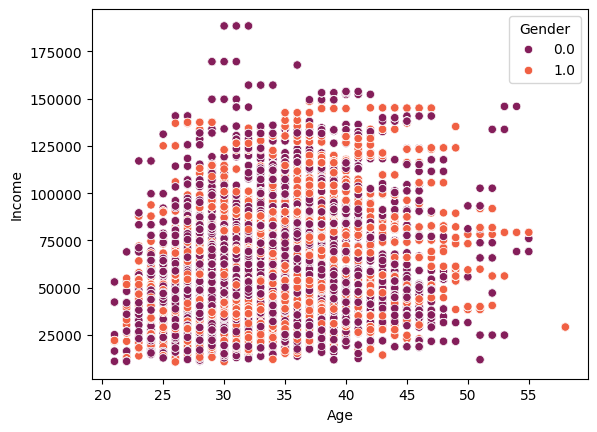

In [ ]:
sns.scatterplot(data=df1,x='Age', y="Income",hue="Gender",palette='rocket')
plt.show()

###Illustrate the insights based on EDA



1.   **Univariate Analysis**



*   It is evident that the **Quarterly Rating** is high for "**1**" and very less for the rating "**4**" the reason could be the people are leaving the company by the time they are reaching the rating "**4**".
*   From the **Gender** , it is evident that there are significantly more male drivers compared to female drivers.
* **Age** is normaly distributed it is clearly shown in the plot.


2.   **Bivariate Analysis**


*   The correlation is very less with in the features and most of the data is categorical in nature.
*   **Income** and **Joining Designation** is very well correlated.






#**Data Preprocessing**

In [ ]:
# Convering date to int64

df1['Date'] = df1['Date'].astype('int64')
df1['Dateofjoining'] = df1['Dateofjoining'].astype('int64')
df1['LastWorkingDate'] = df1['LastWorkingDate'].astype('int64')

In [ ]:
df1.columns

Index(['Date', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
# Terget encoding City feature

df1.groupby(['City'])['Income'].mean()


df1['City_encoded'] = df1['City'].map(df1.groupby(['City'])['Income'].mean())

In [ ]:
df1.drop(columns='City',inplace=True)

In [ ]:
df1.head()

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded
0,1546300800000000000,1,28.0,0.0,2,57387,1545609600000000000,-9223372036854775808,1,1,2381060,2,61722.271375
1,1548979200000000000,1,28.0,0.0,2,57387,1545609600000000000,-9223372036854775808,1,1,-665480,2,61722.271375
2,1551398400000000000,1,28.0,0.0,2,57387,1545609600000000000,1552262400000000000,1,1,0,2,61722.271375
3,1604188800000000000,2,31.0,0.0,2,67016,1604620800000000000,-9223372036854775808,2,2,0,1,66786.801314
4,1606780800000000000,2,31.0,0.0,2,67016,1604620800000000000,-9223372036854775808,2,2,0,1,66786.801314


###KNN Imputation

In [ ]:
# importing KNNImputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2,weights="uniform")

df2 = imputer.fit_transform(df1)

In [ ]:
df1 = pd.DataFrame(df2,columns=df1.columns)

In [ ]:
df1.isnull().sum()

,0
Date,0
Driver_ID,0
Age,0
Gender,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,0
Joining Designation,0
Grade,0


In [ ]:
df1.head()

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded
0,1.546301e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,2381060.0,2.0,61722.271375
1,1.548979e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,-665480.0,2.0,61722.271375
2,1.551398e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,1.552262e+18,1.0,1.0,0.0,2.0,61722.271375
3,1.604189e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314
4,1.606781e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314


##**Feature Engineering**

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df['LastWorkingDate']

,LastWorkingDate
0,NaN
1,NaN
2,03/11/19
3,NaN
4,NaN
...,...
19099,NaN
19100,NaN
19101,NaN
19102,NaN


In [ ]:
df1['LastWorkingDate2'] = df['LastWorkingDate']

In [ ]:
df1.head()

#df1.drop(columns='LastWorkingDate',inplace=True)

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded,LastWorkingDate2
0,1.546301e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,2381060.0,2.0,61722.271375,NaN
1,1.548979e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,-665480.0,2.0,61722.271375,NaN
2,1.551398e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,1.552262e+18,1.0,1.0,0.0,2.0,61722.271375,03/11/19
3,1.604189e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN
4,1.606781e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN


In [ ]:
df1.head()

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded,LastWorkingDate2
0,1.546301e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,2381060.0,2.0,61722.271375,NaN
1,1.548979e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,-665480.0,2.0,61722.271375,NaN
2,1.551398e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,1.552262e+18,1.0,1.0,0.0,2.0,61722.271375,03/11/19
3,1.604189e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN
4,1.606781e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN


In [ ]:
#Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1


#df1['target'] = df1['LastWorkingDate2'].apply(lambda x:1 if pd.notnull(x) else 0)
df1['target'] = df1['LastWorkingDate2'].notnull().astype(int)

In [ ]:
#df1['target'].value_counts()
df1['target'].value_counts()
df1.head()

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded,LastWorkingDate2,target
0,1.546301e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,2381060.0,2.0,61722.271375,NaN,0
1,1.548979e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,-665480.0,2.0,61722.271375,NaN,0
2,1.551398e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,1.552262e+18,1.0,1.0,0.0,2.0,61722.271375,03/11/19,1
3,1.604189e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN,0
4,1.606781e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN,0


In [ ]:
df1['target'].value_counts()

,count
target,
0,17488
1,1616


In [ ]:
#df1.drop(columns='LastWorkingDate2',inplace=True)

In [ ]:
df1.head()

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded,LastWorkingDate2,target
0,1.546301e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,2381060.0,2.0,61722.271375,NaN,0
1,1.548979e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,-665480.0,2.0,61722.271375,NaN,0
2,1.551398e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,1.552262e+18,1.0,1.0,0.0,2.0,61722.271375,03/11/19,1
3,1.604189e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN,0
4,1.606781e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN,0


In [ ]:
#df1['quarter'] = df['MMM-YY'].astype('datetime64[ns]').dt.quarter

In [ ]:
#The code calculates the difference between consecutive Quarterly Rating values for each Driver_ID and stores it in a new column rating_diff.
df1['rating_diff'] = df1.groupby('Driver_ID')['Quarterly Rating'].diff()
df1['rating_increased'] = df1['rating_diff'].apply(lambda x: 1 if x>0 else 0)
df1['rating_increased'].fillna(0, inplace=True)
df1.drop(columns=['rating_diff'],inplace=True)

In [ ]:
df1['income_diff'] = df1.groupby('Driver_ID')['Income'].diff()
df1['income_increased'] = df1['income_diff'].apply(lambda x: 1 if x > 0 else 0)
df1['income_increased'].fillna(0, inplace=True)
df1.drop(columns='income_diff',inplace=True)

In [ ]:
df1.head(10)

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded,LastWorkingDate2,target,rating_increased,income_increased
0,1.546301e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,2381060.0,2.0,61722.271375,NaN,0,0,0
1,1.548979e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,-9.223372e+18,1.0,1.0,-665480.0,2.0,61722.271375,NaN,0,0,0
2,1.551398e+18,1.0,28.0,0.0,2.0,57387.0,1.545610e+18,1.552262e+18,1.0,1.0,0.0,2.0,61722.271375,03/11/19,1,0,0
3,1.604189e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN,0,0,0
4,1.606781e+18,2.0,31.0,0.0,2.0,67016.0,1.604621e+18,-9.223372e+18,2.0,2.0,0.0,1.0,66786.801314,NaN,0,0,0
5,1.575158e+18,4.0,43.0,0.0,2.0,65603.0,1.575677e+18,-9.223372e+18,2.0,2.0,0.0,1.0,62173.028120,NaN,0,0,0
6,1.577837e+18,4.0,43.0,0.0,2.0,65603.0,1.575677e+18,-9.223372e+18,2.0,2.0,0.0,1.0,62173.028120,NaN,0,0,0
7,1.580515e+18,4.0,43.0,0.0,2.0,65603.0,1.575677e+18,-9.223372e+18,2.0,2.0,0.0,1.0,62173.028120,NaN,0,0,0
8,1.583021e+18,4.0,43.0,0.0,2.0,65603.0,1.575677e+18,-9.223372e+18,2.0,2.0,350000.0,1.0,62173.028120,NaN,0,0,0
9,1.585699e+18,4.0,43.0,0.0,2.0,65603.0,1.575677e+18,1.587946e+18,2.0,2.0,0.0,1.0,62173.028120,27/04/20,1,0,0


In [ ]:
#df1.drop(columns='Date_dup',inplace=True)

In [ ]:
df1.loc[df1['Gender']==0.5,'Gender'] = 0

In [ ]:
df1.nunique()

,0
Date,24
Driver_ID,2381
Age,53
Gender,2
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,494
Joining Designation,5
Grade,5


In [ ]:
df1.head()

from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder()

In [ ]:
df1.columns

Index(['Date', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'City_encoded',
       'LastWorkingDate2', 'target', 'rating_increased', 'income_increased'],
      dtype='object')

In [ ]:
df1['Driver_ID'] = df1['Driver_ID'].astype('int64')
df1['Age'] = df1['Age'].astype('int64')
df1['Gender'] = df1['Gender'].astype('int64')
df1['Education_Level'] = df1['Education_Level'].astype('int64')
df1['Joining Designation'] = df1['Joining Designation'].astype('int64')
df1['Grade'] = df1['Grade'].astype('int64')
df1['Quarterly Rating'] = df1['Quarterly Rating'].astype('int64')

###**Class Imbalance treatment**

In [ ]:
df1['income_increased'].value_counts()

,count
income_increased,
0,19060
1,44


In [ ]:
df1.head()

df1.drop(columns = ['LastWorkingDate','LastWorkingDate2'],inplace=True)

In [ ]:
df1.head()

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded,target,rating_increased,income_increased
0,1.546301e+18,1,28,0,2,57387.0,1.545610e+18,1,1,2381060.0,2,61722.271375,0,0,0
1,1.548979e+18,1,28,0,2,57387.0,1.545610e+18,1,1,-665480.0,2,61722.271375,0,0,0
2,1.551398e+18,1,28,0,2,57387.0,1.545610e+18,1,1,0.0,2,61722.271375,1,0,0
3,1.604189e+18,2,31,0,2,67016.0,1.604621e+18,2,2,0.0,1,66786.801314,0,0,0
4,1.606781e+18,2,31,0,2,67016.0,1.604621e+18,2,2,0.0,1,66786.801314,0,0,0


In [ ]:
X = df1.drop(columns='target')
y = df1['target']

In [ ]:
y.value_counts()

,count
target,
0,17488
1,1616


In [ ]:
print(f'X shape {X.shape}\ny shape {y.shape}')

X shape (19104, 14)
y shape (19104,)


In [ ]:
X.head()

,Date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,City_encoded,rating_increased,income_increased
0,1.546301e+18,1,28,0,2,57387.0,1.545610e+18,1,1,2381060.0,2,61722.271375,0,0
1,1.548979e+18,1,28,0,2,57387.0,1.545610e+18,1,1,-665480.0,2,61722.271375,0,0
2,1.551398e+18,1,28,0,2,57387.0,1.545610e+18,1,1,0.0,2,61722.271375,0,0
3,1.604189e+18,2,31,0,2,67016.0,1.604621e+18,2,2,0.0,1,66786.801314,0,0
4,1.606781e+18,2,31,0,2,67016.0,1.604621e+18,2,2,0.0,1,66786.801314,0,0


In [ ]:
y.value_counts()

,count
target,
0,17488
1,1616


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_res, y_res = smote.fit_resample(X,y)

In [ ]:
print(f"X reshaped data {X_res.shape}\ny reshaped data {y_res.shape}")

X reshaped data (34976, 14)
y reshaped data (34976,)


#**Model building**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20,random_state=True)

###**Ensemble - Bagging Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf,X_train,y_train,cv=kfold, scoring='accuracy',return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 83.61 
 Validation: 83.57
K-Fold Accuracy Std: 
 Train: 0.13, 
 Validation: 0.72


It is clearly showing that the score is good for train data and validation data. And also it is showing there is low bias and low veriance

##GridSearchCV

In [ ]:
params = {
          'n_estimators' : [50,100,200],
          'max_depth' : [5,7,10],
          'max_features' : [7,8,10]
         }

In [ ]:
# Defining parameters -

params = {
          'n_estimators' : [10,50,100,150,200],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV
import datetime as dt

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
start = dt.datetime.now()
grid.fit(X_train,y_train)
end = dt.datetime.now()


print('Best params:',grid.best_params_)
print('Best params:',grid.best_score_)

Best params: {'max_depth': 10, 'max_features': 10, 'n_estimators': 50}
Best params: 0.8889922187096061


In [ ]:
time = end - start
print(time)

0:05:56.215246


If GridSearchCV is taking too long to complete (e.g., 37 minutes), we can speed up the hyperparameter tuning process by using RandomizedSearchCV. Instead of exhaustively searching through all possible combinations, RandomizedSearchCV randomly samples a specified number of hyperparameter settings, which significantly reduces the computation time while still providing good results.

In [ ]:
res = grid.cv_results_

for i in range(len(res['params'])):
  print(f"Parameters: {res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'n_estimators': 10} Mean_score: 0.8284846454929133 Rank: 174
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'n_estimators': 50} Mean_score: 0.8342747100003209 Rank: 143
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'n_estimators': 100} Mean_score: 0.8371693935292922 Rank: 123
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'n_estimators': 150} Mean_score: 0.8358827717129181 Rank: 128
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'n_estimators': 200} Mean_score: 0.8339171790103611 Rank: 147
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 10} Mean_score: 0.8288420500222559 Rank: 172
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators':

###RandomizedSearchCV

In [ ]:
# Defining parameters -

params = {
     "n_estimators":[10,25,50,100,150,200],
    'max_depth':[3, 5, 10, 15, 20],
    'max_leaf_nodes':[20, 40, 80]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

model = RandomForestClassifier(n_jobs=-1)

clf = RandomizedSearchCV(model,param_distributions=params,cv = 3,random_state=42,scoring='accuracy')

start = dt.datetime.now()
clf.fit(X_train,y_train)
end = dt.datetime.now()

In [ ]:
res = clf.cv_results_

for i in range(len(res['params'])):
  print(f"Parameters: {res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters: {'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 10} Mean_score: 0.8472837520187616 Rank: 4
Parameters: {'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.8424946846111677 Rank: 8
Parameters: {'n_estimators': 25, 'max_leaf_nodes': 20, 'max_depth': 15} Mean_score: 0.8446033464253796 Rank: 7
Parameters: {'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 15} Mean_score: 0.8652608951895706 Rank: 1
Parameters: {'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.8186204720900537 Rank: 10
Parameters: {'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 5} Mean_score: 0.8457112487324526 Rank: 5
Parameters: {'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 10} Mean_score: 0.8449607164654628 Rank: 6
Parameters: {'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 15} Mean_score: 0.8570049827705839 Rank: 2
Parameters: {'n_estimators': 150, 'max_leaf_nodes': 40, 'max_depth': 3} Mean_score: 0.8276984283390182 Rank: 

In [ ]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=15, max_leaf_nodes=80, n_estimators=150,
                       n_jobs=-1)


In [ ]:
rf = clf.best_estimator_

rf.fit(X_train,y_train)

print(f'model accuracy: {rf.score(X_test,y_test)}')

model accuracy: 0.8680674671240709


We can see the improvement using the **RandomForestClassifier** and the best estimators are max_depth=15, max_leaf_nodes=80, n_estimators=150,
                       n_jobs=-1, and the rank one score is **0.86451040124398** there is a great improvement in the score.



*  It picked the best of best not the best one. It is clearly evident that in the GridSearchCV the score is close to 90% but **RandomForestClassifier** gave us 86%.




                      

#Ensemble - Boosting Algorithm

###**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

In [ ]:
params = {
    'n_estimators' : [50,100,150,200],
    'max_depth' : [3,5,7,10],
    'max_leaf_nodes':[20, 40, 80],
    'learning_rate' : [0.1,0.2,0.3]
}

In [ ]:
gbc = GBC()

clf = RandomizedSearchCV(gbc,param_distributions=params,cv=3,random_state=42,verbose=1,n_jobs=-1,scoring='accuracy')

start = dt.datetime.now()

clf.fit(X_train, y_train)

end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = clf.cv_results_

for i in range(len(res['params'])):
  print(f"parameters: {res['params'][i]}, mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

parameters: {'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 5, 'learning_rate': 0.3}, mean_score: 0.941100829556357 Rank: 3
parameters: {'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 5, 'learning_rate': 0.1}, mean_score: 0.9404216900560177 Rank: 4
parameters: {'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 7, 'learning_rate': 0.2}, mean_score: 0.9442102432134277 Rank: 1
parameters: {'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 3, 'learning_rate': 0.3}, mean_score: 0.93341669157366 Rank: 8
parameters: {'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 3, 'learning_rate': 0.2}, mean_score: 0.8891350923821251 Rank: 10
parameters: {'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 5, 'learning_rate': 0.1}, mean_score: 0.8891352226748822 Rank: 9
parameters: {'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 10, 'learning_rate': 0.3}, mean_score: 0.936740563276896 Rank: 6
parameters: {'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth'

In [ ]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_leaf_nodes=80,
                           n_estimators=150)


In [ ]:
gf = clf.best_estimator_

gf.fit(X_train,y_train)

print(f'model accuracy: {gf.score(X_test,y_test)}')

model accuracy: 0.9495425957690109


The score have shown a great growth using the **GradientBoostingClassifier** and the GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_leaf_nodes=80,
                           n_estimators=150) with the score **0.944**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = gf.predict(X_test)

classification_report(y_test, y_pred,output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3560
           1       0.96      0.94      0.95      3436

    accuracy                           0.95      6996
   macro avg       0.95      0.95      0.95      6996
weighted avg       0.95      0.95      0.95      6996



In [ ]:
feature_importance = gf.feature_importances_

features = np.array(X.columns)

most_imp_features = features[np.argmax(feature_importance)]

print(f"The most important feature is: {most_imp_features}")

The most important feature is: Quarterly Rating


###XGBClassifier

In [ ]:
from xgboost import XGBClassifier

params = {
    'n_estimators' : [50,100,150,200],
    'max_depth' : [3,5,7,10],
    'learning_rate' : [0.1,0.2,0.3],
    'objective' : ['binary:logistic']
}

xgb = XGBClassifier()

clf = RandomizedSearchCV(xgb,param_distributions=params,cv=3,n_jobs=-1,verbose=1,scoring='accuracy',random_state=42)

start = dt.datetime.now()
clf.fit(X_train,y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
print(end - start)


0:00:14.609294


In [ ]:
res = clf.cv_results_

for i in range(len(res['params'])):
  print(f"parameters {res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

#for i in range(len(res['params'])):
#  print(f"parameters: {res['params'][i]}, mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

parameters {'objective': 'binary:logistic', 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2} Mean_score: 0.9412080030134109 Rank: 1
parameters {'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.3} Mean_score: 0.933309625416524 Rank: 6
parameters {'objective': 'binary:logistic', 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2} Mean_score: 0.9397784768673986 Rank: 3
parameters {'objective': 'binary:logistic', 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.3} Mean_score: 0.9409578447517806 Rank: 2
parameters {'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.2} Mean_score: 0.9270193900071725 Rank: 7
parameters {'objective': 'binary:logistic', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3} Mean_score: 0.9338456881409288 Rank: 5
parameters {'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1} Mean_score: 0.9224090191160398 Rank: 9
parameter

In [ ]:
xf = clf.best_estimator_

xf.score(X_train,y_train)

print(f'model accuracy: {xf.score(X_test,y_test)}')

model accuracy: 0.948256146369354


It is clearly great model with low bias and low veriance and the **test_score** for **XGBClassifier** with **94.90**

##**LightGBM**

In [ ]:
import lightgbm as lgb

params = {
    'n_estimators' : [50,100,150,200],
    'max_depth' : [3,5,7,10],
    'learning_rate' : [0.1,0.2,0.3]
}

lgb_model = lgb.LGBMClassifier(random_state=42,n_jobs=-1)

In [ ]:
clf = RandomizedSearchCV(lgb_model, param_distributions=params,cv=5,random_state=42,n_jobs=-1,verbose=1,scoring='accuracy')

clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14052, number of negative: 13928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1593
[LightGBM] [Info] Number of data points in the train set: 27980, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502216 -> initscore=0.008864
[LightGBM] [Info] Start training from score 0.008864


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
res = clf.cv_results_

for i in range(len(res['params'])):
  print(f"Parameters {res['params'][i]} mean_score {res['mean_test_score'][i]} Rank {res['rank_test_score'][i]}")

Parameters {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2} mean_score 0.9466761972837741 Rank 2
Parameters {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.3} mean_score 0.9395282344531809 Rank 6
Parameters {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2} mean_score 0.9466047176554682 Rank 3
Parameters {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.3} mean_score 0.9469978556111508 Rank 1
Parameters {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.2} mean_score 0.9321658327376697 Rank 8
Parameters {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3} mean_score 0.9431736954967833 Rank 5
Parameters {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1} mean_score 0.9154038598999286 Rank 9
Parameters {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2} mean_score 0.93831308077198 Rank 7
Parameters {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1} mean_score 0.8923516797712653 Rank 10
Parameters {'n_estimators': 100,

In [ ]:
lgb = clf.best_estimator_

lgb.score(X_train,y_train)
print(f'model accuracy: {lgb.score(X_test,y_test)}')

model accuracy: 0.9491137793024585


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

probability = lgb.predict_proba(X_test)

probability

probabilites = probability[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

In [ ]:
# AUC
roc_auc_score(y_test,probabilites)

0.9908303194202823

Precision Recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

In [ ]:
auc(recall, precision)

0.9916550135823659

Conclusion it is clear that the **LGBMClassifier** have a decent score with **94.9%**.